# Actividad - Ecuaciones diferenciales

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp, odeint

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [7]:
def fun(t,x):
    return x/(t+1)
t=[0,100]
x0=np.array([0.5])
sol_x=solve_ivp(fun,t,x0,max_step=0.001)
sol_x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-03 ...  1.000e+02  1.000e+02]
        y: [[ 5.000e-01  5.005e-01 ...  5.050e+01  5.050e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 600002
     njev: 0
      nlu: 0

In [8]:
sol_x.t

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 9.9998e+01, 9.9999e+01,
       1.0000e+02])

In [9]:
sol_x.y

array([[ 0.5   ,  0.5005,  0.501 , ..., 50.499 , 50.4995, 50.5   ]])

Grafique con condición inicial $x_0 = 2$

In [12]:
x02=np.array([2])
sol_x2=solve_ivp(fun,t,x02,max_step=0.001)

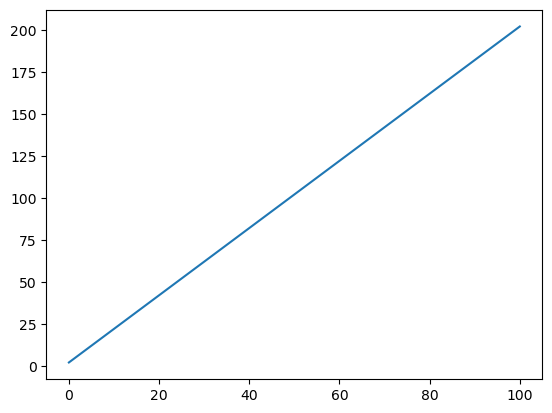

In [14]:
plt.figure()
t_analitico=np.linspace(0,50,1000)
plt.plot(sol_x2.t,sol_x2.y[0,:])

In [15]:
sol_x2.y.max()

201.99999999997223

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

 Investigar cambio de variable

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [23]:
def oscilador(t,X, w0):
    x,v=X[0],X[1]
    dx,dv=v,-w0**2*x
    return [dx,dv]

tspan=[0,10]
x0=np.array([0.5,0.1])
sol=solve_ivp(oscilador,tspan,x0,args=(3,),max_step=0.0001)
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  1.000e+01  1.000e+01]
        y: [[ 5.000e-01  5.000e-01 ...  4.419e-02  4.419e-02]
            [ 1.000e-01  9.955e-02 ...  1.497e+00  1.497e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 600008
     njev: 0
      nlu: 0

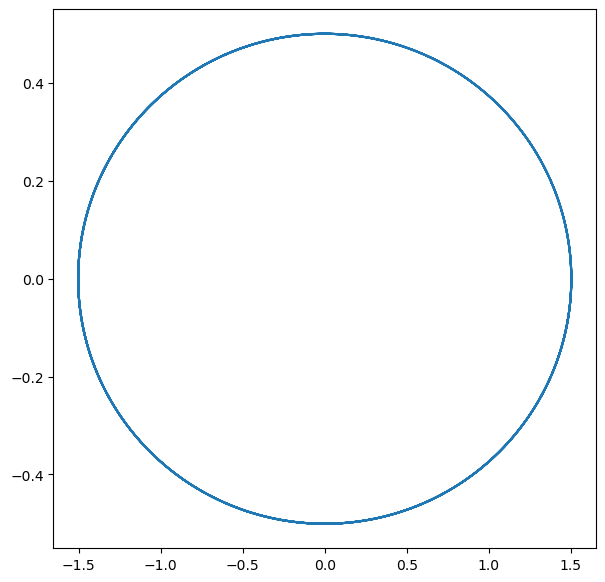

In [27]:
plt.figure(figsize=(7,7))
#plt.plot(sol.t,sol.y[1,:])
#plt.plot(sol.t,sol.y[0,:])
plt.plot(sol.y[1,:],sol.y[0,:])

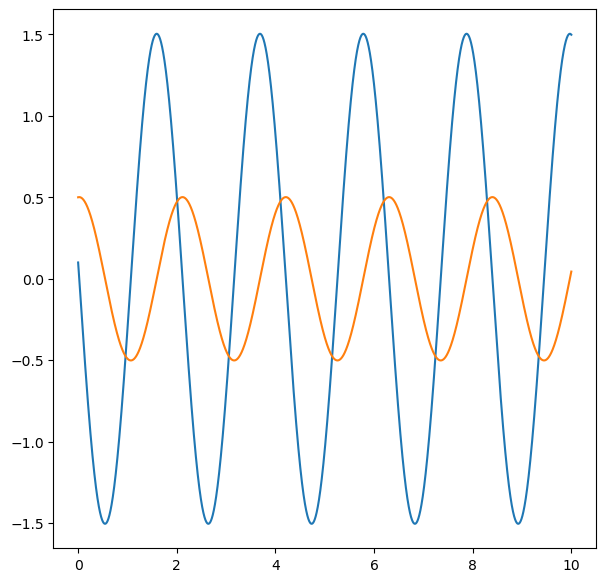

In [28]:
plt.figure(figsize=(7,7))
plt.plot(sol.t,sol.y[1,:])
plt.plot(sol.t,sol.y[0,:])

Grafique

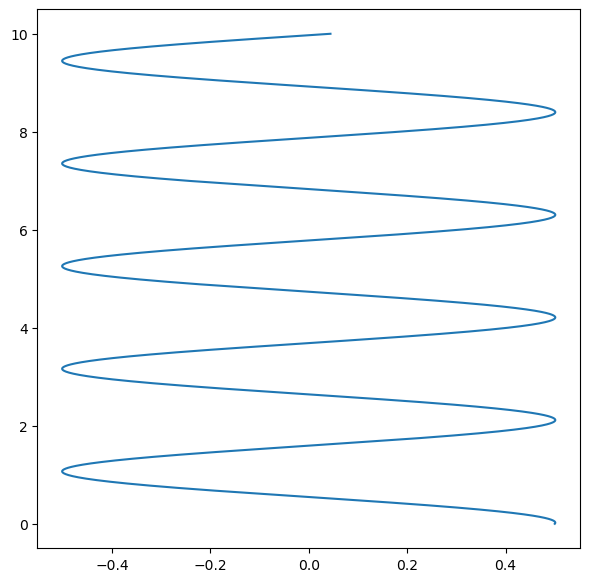

In [30]:
plt.figure(figsize=(7,7))
plt.plot(sol.y[0,:],sol.t)


Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [ ]:
C1,C2,t,w0=x0,x0/w0,np.linspace(0,10,10000),3
def pos(t,w0,x0,v0):
    return oscilador(t,tspan, w0)[0]


Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.